# Logistic Regression

#### Classifier will predict the type of investment the company will get

### Creating Dataset......

In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import plotly.plotly as py

In [9]:
Companies = pd.read_csv('C:/Users/mphan21/Google Drive/Research/projects/Venture/data/Companies.csv')

In [10]:
print Companies.columns

Index([u'name', u'category_code', u'funding_total_usd', u'status',
       u'country_code', u'state_code', u'region', u'city', u'funding_rounds',
       u'founded_year'],
      dtype='object')


In [11]:
Companies.drop(['funding_rounds','founded_year'],axis=1,inplace=True)

In [12]:
print len(Companies)
print len(np.unique(Companies['name']))
print Companies['funding_total_usd'][0]

37875
37875
750,000


In [13]:
Rounds = pd.read_csv('C:/Users/mphan21/Google Drive/Research/projects/Venture/data/Rounds.csv')

In [14]:
print Rounds.columns

Index([u'company_name', u'funding_round_type', u'funded_year',
       u' raised_amount_usd '],
      dtype='object')


In [15]:
Rounds.rename(columns={'company_name':'name'},inplace=True)

In [16]:
print Rounds.columns

Index([u'name', u'funding_round_type', u'funded_year', u' raised_amount_usd '], dtype='object')


In [17]:
print np.unique(Rounds.funding_round_type)

['angel' 'crowdfunding' 'other' 'post-ipo' 'private-equity' 'series-a'
 'series-b' 'series-c+' 'venture']


In [18]:
data = pd.merge(Companies,Rounds,how='inner',on='name')

In [19]:
print data.columns
print len(data)

Index([u'name', u'category_code', u'funding_total_usd', u'status',
       u'country_code', u'state_code', u'region', u'city',
       u'funding_round_type', u'funded_year', u' raised_amount_usd '],
      dtype='object')
64107


In [20]:
data.drop(['name','funded_year',' raised_amount_usd ','funding_total_usd'],axis=1,inplace=True)

#### Encoding the categorical features into integers.......

In [21]:
def onehotencode_toIntegers(data):
    
    unique_tokens=np.unique(data['category_code']).copy()
    print "encoding categories...",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['category_code'][data['category_code']==value] = index

    unique_tokens=np.unique(data['status']).copy()
    print "encoding status....",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['status'][data['status']==value] = index
        
    unique_tokens=np.unique(data['country_code']).copy()
    print "encoding countries....",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['country_code'][data['country_code']==value] = index
        
    unique_tokens=np.unique(data['state_code']).copy()
    print "encoding states....",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['state_code'][data['state_code']==value] = index
        
    unique_tokens=np.unique(data['region']).copy()
    print "encoding regions....",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['region'][data['region']==value] = index
        
    unique_tokens=np.unique(data['city']).copy()
    print "encoding cities....",len(unique_tokens)
    for index,value in enumerate(unique_tokens):
        data['city'][data['city']==value] = index
        
    unique_tokens=np.unique(data['funding_round_type']).copy()
    print "encoding funding_round_type.....",len(unique_tokens)
    print "unique labels : ",unique_tokens
    for index,value in enumerate(unique_tokens):
        data['funding_round_type'][data['funding_round_type']==value] = index
    
    data.to_csv("C:/Users/mphan21/Google Drive/Research/projects/Venture/data/output.csv")    
    

In [22]:
print data.columns

Index([u'category_code', u'status', u'country_code', u'state_code', u'region',
       u'city', u'funding_round_type'],
      dtype='object')


In [23]:
data = data.sort(['funding_round_type'])
data.dropna()

C:\Users\mphan21\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,category_code,status,country_code,state_code,region,city,funding_round_type
30320,manufacturing,operating,USA,CA,SF Bay,LOS ALTOS HILLS,angel
30319,manufacturing,operating,USA,CA,SF Bay,LOS ALTOS HILLS,angel
30262,mobile,operating,USA,CA,SF Bay,San Francisco,angel
30261,mobile,operating,USA,CA,SF Bay,San Francisco,angel
30258,software,operating,USA,CA,San Diego,Carlsbad,angel
30255,consulting,operating,USA,IL,Chicago,Chicago,angel
30304,enterprise,operating,USA,CO,Denver,Boulder,angel
30449,advertising,operating,USA,CA,SF Bay,Mountain View,angel
30438,social,operating,USA,NY,New York,New York,angel
30409,other,operating,USA,CO,Denver,Englewood,angel


#### Removing Noise from the dataset

In [24]:
data = data[data.category_code.notnull()]
data = data[data.status.notnull()]
data = data[data.country_code.notnull()]
data = data[data.state_code.notnull()]
data = data[data.region.notnull()]
data = data[data.city.notnull()]
data = data[data.funding_round_type.notnull()]

In [25]:
print len(data)

42019


In [30]:
Original_data = data.copy()
labels = np.unique(data.funding_round_type)
print labels

['angel' 'crowdfunding' 'other' 'post-ipo' 'private-equity' 'series-a'
 'series-b' 'series-c+' 'venture']


In [31]:
from scipy import stats
labels_freq = data.funding_round_type.copy()
freq = stats.itemfreq(labels_freq)
print freq

[['angel' 8185L]
 ['crowdfunding' 71L]
 ['other' 4819L]
 ['post-ipo' 143L]
 ['private-equity' 964L]
 ['series-a' 7174L]
 ['series-b' 3790L]
 ['series-c+' 3708L]
 ['venture' 13165L]]


In [32]:
d = pd.DataFrame()
d['investment_type']= labels
d['freq'] = 0
for i,v in enumerate(freq):
    Index = d.investment_type[d.investment_type==v[0]].index
    print v[1]
    d.at[Index,'freq'] = v[1]

8185
71
4819
143
964
7174
3790
3708
13165


In [34]:
d.to_csv("C:/Users/mphan21/Google Drive/Research/projects/Venture/data/investment_type.csv")

In [35]:
onehotencode_toIntegers(data)

encoding categories... 43
encoding status.... 4
encoding countries.... 24
encoding states.... 51
encoding regions.... 847
encoding cities.... 2337
encoding funding_round_type..... 9
unique labels :  ['angel' 'crowdfunding' 'other' 'post-ipo' 'private-equity' 'series-a'
 'series-b' 'series-c+' 'venture']


In [37]:
print np.unique(data.funding_round_type)

[0 1 2 3 4 5 6 7 8]


In [38]:
data.dropna()

,category_code,status,country_code,state_code,region,city,funding_round_type
30320,19,3,23,4,625,986,0
30319,19,3,23,4,625,986,0
30262,22,3,23,4,625,1792,0
30261,22,3,23,4,625,1792,0
30258,38,3,23,4,642,336,0
30255,5,3,23,14,126,383,0
30304,9,3,23,5,171,233,0
30449,0,3,23,4,625,1285,0
30438,37,3,23,34,482,1352,0
30409,28,3,23,5,171,615,0


Changing datatype of features to integer

In [39]:
data['category_code'] = data['category_code'].astype(int)
data['status'] = data['status'].astype(int)
data['country_code'] = data['country_code'].astype(int)
data['region'] = data['region'].astype(int)
data['state_code'] = data['state_code'].astype(int)
data['city'] = data['city'].astype(int)
data['funding_round_type'] = data['funding_round_type'].astype(int)


#### Creating training and test set by 70 % and 30% ratio

In [40]:
Y = data.funding_round_type

data.drop(['funding_round_type'],axis=1,inplace=True)

In [41]:
print data.columns
print Y[:3]
print len(np.unique(Y))

Index([u'category_code', u'status', u'country_code', u'state_code', u'region',
       u'city'],
      dtype='object')
30320    0
30319    0
30262    0
Name: funding_round_type, dtype: int32
9


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(data,Y,test_size=0.3)

In [43]:
print "Xtrain : ",X_train.shape
print "Xtest : ",X_test.shape
print "Ytrain : ",Y_train.shape
print "Ytest : ",Y_test.shape

Xtrain :  (29413, 6)
Xtest :  (12606, 6)
Ytrain :  (29413L,)
Ytest :  (12606L,)


### Classification

In [46]:

from sklearn import linear_model

In [47]:
classifier = linear_model.LogisticRegression(penalty='l2',solver='lbfgs',multi_class='multinomial')

In [48]:
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = classifier.predict(X_test)

In [50]:
accuracy = classifier.score(X_test,Y_test)

In [51]:
print accuracy*100,"%"

31.7229890528 %


In [52]:
from sklearn import metrics

In [53]:
print "classification report : "
print(metrics.classification_report(Y_test, predictions))

classification report : 
             precision    recall  f1-score   support

          0       0.26      0.19      0.22      2456
          1       0.00      0.00      0.00        22
          2       0.00      0.00      0.00      1414
          3       0.00      0.00      0.00        41
          4       0.00      0.00      0.00       286
          5       0.50      0.00      0.00      2200
          6       0.00      0.00      0.00      1120
          7       0.00      0.00      0.00      1108
          8       0.33      0.89      0.48      3959

avg / total       0.24      0.32      0.19     12606



C:\Users\mphan21\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [54]:
print "confusion matrix : "
print(metrics.confusion_matrix(Y_test, predictions))

confusion matrix : 
[[ 478    0    0    0    0    0    0    0 1978]
 [   2    0    0    0    0    0    0    0   20]
 [ 143    0    0    0    0    1    0    0 1270]
 [   2    0    0    0    0    0    0    0   39]
 [  24    0    0    0    0    0    0    0  262]
 [ 384    0    0    0    0    1    0    0 1815]
 [ 203    0    0    0    0    0    0    0  917]
 [ 192    0    0    0    0    0    0    0  916]
 [ 439    0    0    0    0    0    0    0 3520]]


### Visualization

In [55]:
import pylab as pl
import collections

In [56]:
print np.unique(predictions)
print len(np.unique(Y_test))
print np.unique(Y_test)

[0 5 8]
9
[0 1 2 3 4 5 6 7 8]


In [57]:
print labels

['angel' 'crowdfunding' 'other' 'post-ipo' 'private-equity' 'series-a'
 'series-b' 'series-c+' 'venture']


In [58]:
frequencies = collections.Counter(Y_test)
print frequencies

Counter({8: 3959, 0: 2456, 5: 2200, 2: 1414, 6: 1120, 7: 1108, 4: 286, 3: 41, 1: 22})


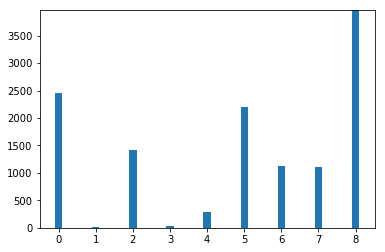

In [59]:
X = np.arange(len(frequencies))
pl.bar(X, frequencies.values(), align='center', width=0.2)
pl.xticks(X, frequencies.keys())
ymax = max(frequencies.values()) + 1
pl.ylim(0, ymax)
fig = pl.figure()
pl.show()

In [60]:
frequencies = collections.Counter(Y_train)
print frequencies

Counter({8: 9206, 0: 5729, 5: 4974, 2: 3405, 6: 2670, 7: 2600, 4: 678, 3: 102, 1: 49})


In [61]:
for i,v in frequencies.iteritems():
    frequencies[i] /= 29413.0
    frequencies[i] *= 100

print frequencies

Counter({8: 31.299085438411588, 0: 19.47778193315881, 5: 16.91088974263081, 2: 11.576513786420971, 6: 9.07761874001292, 7: 8.839628735593106, 4: 2.305103185666202, 3: 0.34678543501172954, 1: 0.16659300309387004})


In [62]:
size = []
for i,v in frequencies.iteritems():
    size.append(v)

sizes = np.array(size)
sizes = sizes.astype(float)
print sizes

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','yellow','blue','green','black','red']
explode = (0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2,0.2) 

[ 19.47778193   0.166593    11.57651379   0.34678544   2.30510319
  16.91088974   9.07761874   8.83962874  31.29908544]


In [69]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

fig = plt.figure()
ax = fig.gca()

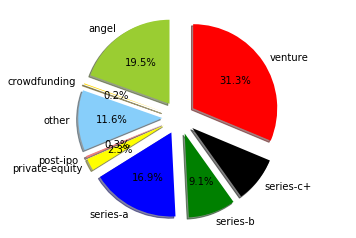

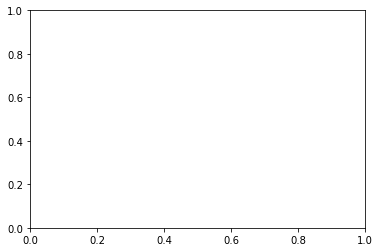

In [70]:
plt.show()